# Lab2 – Problem 1 & Problem 2

> Student Name: Zhang Jingxuan Student Number: A0326409A

### Import Libraries

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

### Import Functions from Numerical Recipes

In [4]:
# polint function from polint.py in Numerical Recipes
def polint(xa, ya, n, x, y, dy):
    # initialize c and d to be equal to ya

    c = ya.copy()
    d = ya.copy()
    # then find an index ns which is closest to the value x in xa()
    ns = 0
    dif = math.fabs(x - xa[0])
    for i in range(1, n):
        dift = math.fabs(x - xa[i])
        if (dift < dif):
            ns = i
            dif = dift
    y[0] = ya[ns]
    ns -= 1

    # do double loop over column m and row i on the triangular Tableau.
    # we don't try to catch the dividing by 0 error, let Python itself do it
    for m in range(1, n):
        for i in range(0, n - m):
            ho = xa[i] - x
            hp = xa[i + m] - x
            w = c[i + 1] - d[i]
            den = ho - hp
            den = w / den
            d[i] = hp * den
            c[i] = ho * den
        # end for i
        # tricking coding here in C
        if (2 * (ns + 1) < (n - m)):
            dy[0] = c[ns + 1]
        else:
            dy[0] = d[ns]
            ns -= 1
        # end if else
        y[0] += dy[0]
    # end for m
    print(c)
    print(d)

# trapezoidal rule from trapzd.py in Numerical Recipes

# The square function
def FUNC(x):
    return (x*x)

# trapzd takes a function as input, with a limit (a,b), at n-th iteration.
# C uses static variable s. But in Python, I better pass it as argument.
# the last argument s is the value calculated in previous iteration.
def trapzd(FUNC, a, b, n, s):
    if n==1:
        s = 0.5*(b-a)*(FUNC(a)+FUNC(b))
        return s
    else:
        it = 2**(n-2)
        d = (b-a)/it
        x = a + 0.5*d
        sum = 0.0
        for j in range(0,it):
            sum += FUNC(x)
            x += d
        s = 0.5*(s + (b-a)*sum/it)
        return s
    # end if
# end def trapzd

# Call trapzd n time to get to the desired accuracy
# qtrap() returns the integral of the function FUNC from a to b.
# The parameter EPS can be set to the desired relative accuracy
# JMAX is the maximum allowed number of steps, refining the interval
# to (b-a)/2**(JMAX-1).  Integration is performed by the trapzoidal rule.
def qtrap(FUNC, a, b):
    EPS = 1.0e-8
    JMAX = 20
    olds = -1.0e300
    s = 0.0
    for j in range(1, JMAX):
        s = trapzd(FUNC,a,b,j,s)
        if (math.fabs(s-olds) < EPS*math.fabs(olds)):
            return s
        if(s == 0.0 and olds == 0.0 and j > 6):
            return s
        olds = s
# end def qtrap

# testing int_0^1 x^2 dx:
res = qtrap(FUNC,0.0,1.0)
print(res)

0.33333333395421505


### Problem 1

[0.0, -5.0, 4.5, 0.0]
[6.25, -12.5, 7.5, 0.0]
[-0.010361598235706766, -4.9652778745507025, 4.487479131886477, 0.0]
[6.196235744952672, -12.444409761028165, 7.487479131886477, 0.0]
[-0.020578764092701513, -4.930671876611269, 4.474958263772955, 0.0]
[6.142761081671385, -12.388935649566193, 7.474958263772955, 0.0]
[-0.030652224579601647, -4.896182006181701, 4.462437395659434, 0.0]
[6.089575283147524, -12.33357766561409, 7.462437395659434, 0.0]
[-0.040582706705024965, -4.861808263261994, 4.44991652754591, 0.0]
[6.036677622372468, -12.278335809171844, 7.44991652754591, 0.0]
[-0.0503709374775893, -4.827550647852152, 4.4373956594323865, 0.0]
[5.9840673723376, -12.223210080239463, 7.4373956594323865, 0.0]
[-0.06001764390591206, -4.793409159952175, 4.4248747913188655, 0.0]
[5.931743806034307, -12.16820047881695, 7.4248747913188655, 0.0]
[-0.06952355299861106, -4.759383799562061, 4.412353923205342, 0.0]
[5.879706196453965, -12.113307004904298, 7.412353923205342, 0.0]
[-0.07888939176430394, -4.72

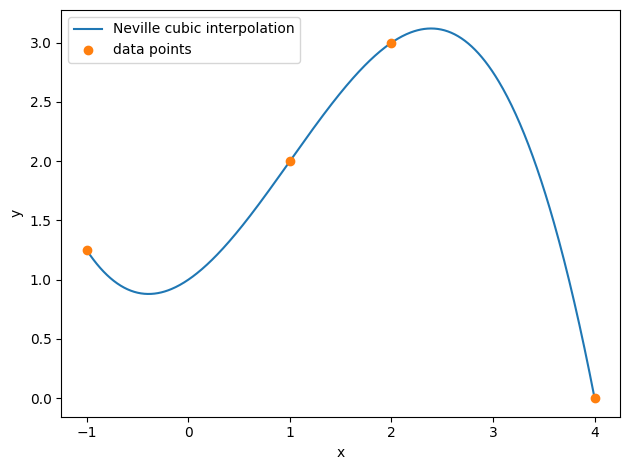

In [5]:
xa = [-1.0, 1.0, 2.0, 4.0]
ya = [ 1.25, 2.0, 3.0, 0.0]
n = len(xa)

def y_at(x):
    y, dy = [0.0], [0.0]
    polint(xa, ya, n, x, y, dy)
    return y[0]

xs = np.linspace(-1.0, 4.0, 600)
ys = [y_at(x) for x in xs]

plt.figure()
plt.plot(xs, ys, '-', label='Neville cubic interpolation')
plt.plot(xa, ya, 'o', label='data points')
plt.xlabel('x'); plt.ylabel('y'); plt.legend(); plt.tight_layout()
plt.show()

### Problem 2

#### Functions defined

In [6]:
def qromb(FUNC, a, b, EPS=1e-10, JMAX=25, K=5):
    s_vals, x_vals = [], []
    s_prev = 0.0
    y_best, dy_best = None, None

    for j in range(1, JMAX + 1):
        s_prev = trapzd(FUNC, a, b, j, s_prev)
        s_vals.append(s_prev)

        h = (b - a) / (1 << (j - 1))
        x_vals.append(h * h)

        if j >= K:
            xa = x_vals[j - K: j]
            ya = s_vals[j - K: j]
            y, dy = [0.0], [0.0]
            polint(xa, ya, K, 0.0, y, dy)
            y_best, dy_best = y[0], dy[0]

            if abs(dy_best) <= EPS * abs(y_best):
                return y_best, dy_best, j

    return y_best, dy_best, JMAX

def f1(x):  # ln(1 + x + x^2)
    return math.log(1.0 + x + x*x)

def f2(x):  # [ln(1 + x + x^2)]^2
    v = math.log(1.0 + x + x*x)
    return v*v

In [10]:
a, b = 0.0, 4.0

for name, f in [("f1: ln(1+x+x^2)", f1), ("f2: [ln(1+x+x^2)]^2", f2)]:
    val, err, iters = qromb(f, a, b, EPS=1e-10, JMAX=25, K=5)
    print(f"{name}: Romberg ≈ {val:.16g}, est.err ≈ {err:.2e}, iterations={iters}\n")

[-0.0004890915911290156, -0.00064461803546058, -0.0013457549404421343, 0.012353843946024531, 7.1818448646142565]
[-1.9105140278477173e-06, -1.0072156804071563e-05, -8.41096837776334e-05, 0.0030884609865061328, 7.1818448646142565]
[3.787105030249117e-06, -6.2998451528468565e-06, -9.031109384996702e-05, 0.0030037943360217887, 7.184097710366273]
[1.4793379024410613e-08, -9.843508051323213e-08, -5.644443365622939e-06, 0.0007509485840054472, 7.184097710366273]
[2.1290644653125572e-07, 1.1363970021126086e-07, -5.532579285727479e-06, 0.0007457617909250777, 7.184657031709467]
[8.316658067627177e-10, 1.7756203158009509e-09, -3.457862053579674e-07, 0.00018644044773126942, 7.184657031709467]
[1.0284940670386708e-09, 2.800096827890252e-09, -3.4302986004301296e-07, 0.0001861188572374791, 7.184796620852395]
[4.017554949369808e-12, 4.3751512935785186e-11, -2.143936625268831e-08, 4.652971430936977e-05, 7.184796620852395]
f1: ln(1+x+x^2): Romberg ≈ 7.184843129175107, est.err ≈ 4.02e-12, iterations=8

[